# MarsToday: evaluating Mars climate through REMS sensor onboard Curiosity Mars rover

## Curiosity on Mars: the Gale crater

Curiosity landed in Quad 51 (nicknamed Yellowknife) of Aeolis Palus in the crater Gale. The landing site coordinates are: 4.5895°S 137.4417°E. The location was named Bradbury Landing on 22 August 2012, in honor of science fiction author Ray Bradbury. Gale, an estimated 3.5 to 3.8 billion-year-old impact crater, is hypothesized to have first been gradually filled in by sediments; first water-deposited, and then wind-deposited, possibly until it was completely covered.

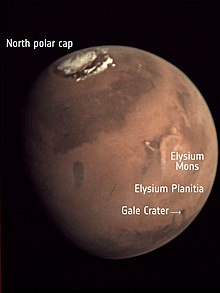

A Mars rover is a motor vehicle designed to travel on the surface of Mars. Rovers have several advantages over stationary landers: they examine more territory, they can be directed to interesting features, they can place themselves in sunny positions to weather winter months, and they can advance the knowledge of how to perform very remote robotic vehicle control.

The four science goals of NASA's long-term Mars Exploration Program are:

- Determine whether life ever arose on Mars
- Characterize the climate of Mars
- Characterize the geology of Mars
- Prepare for human exploration of Mars.

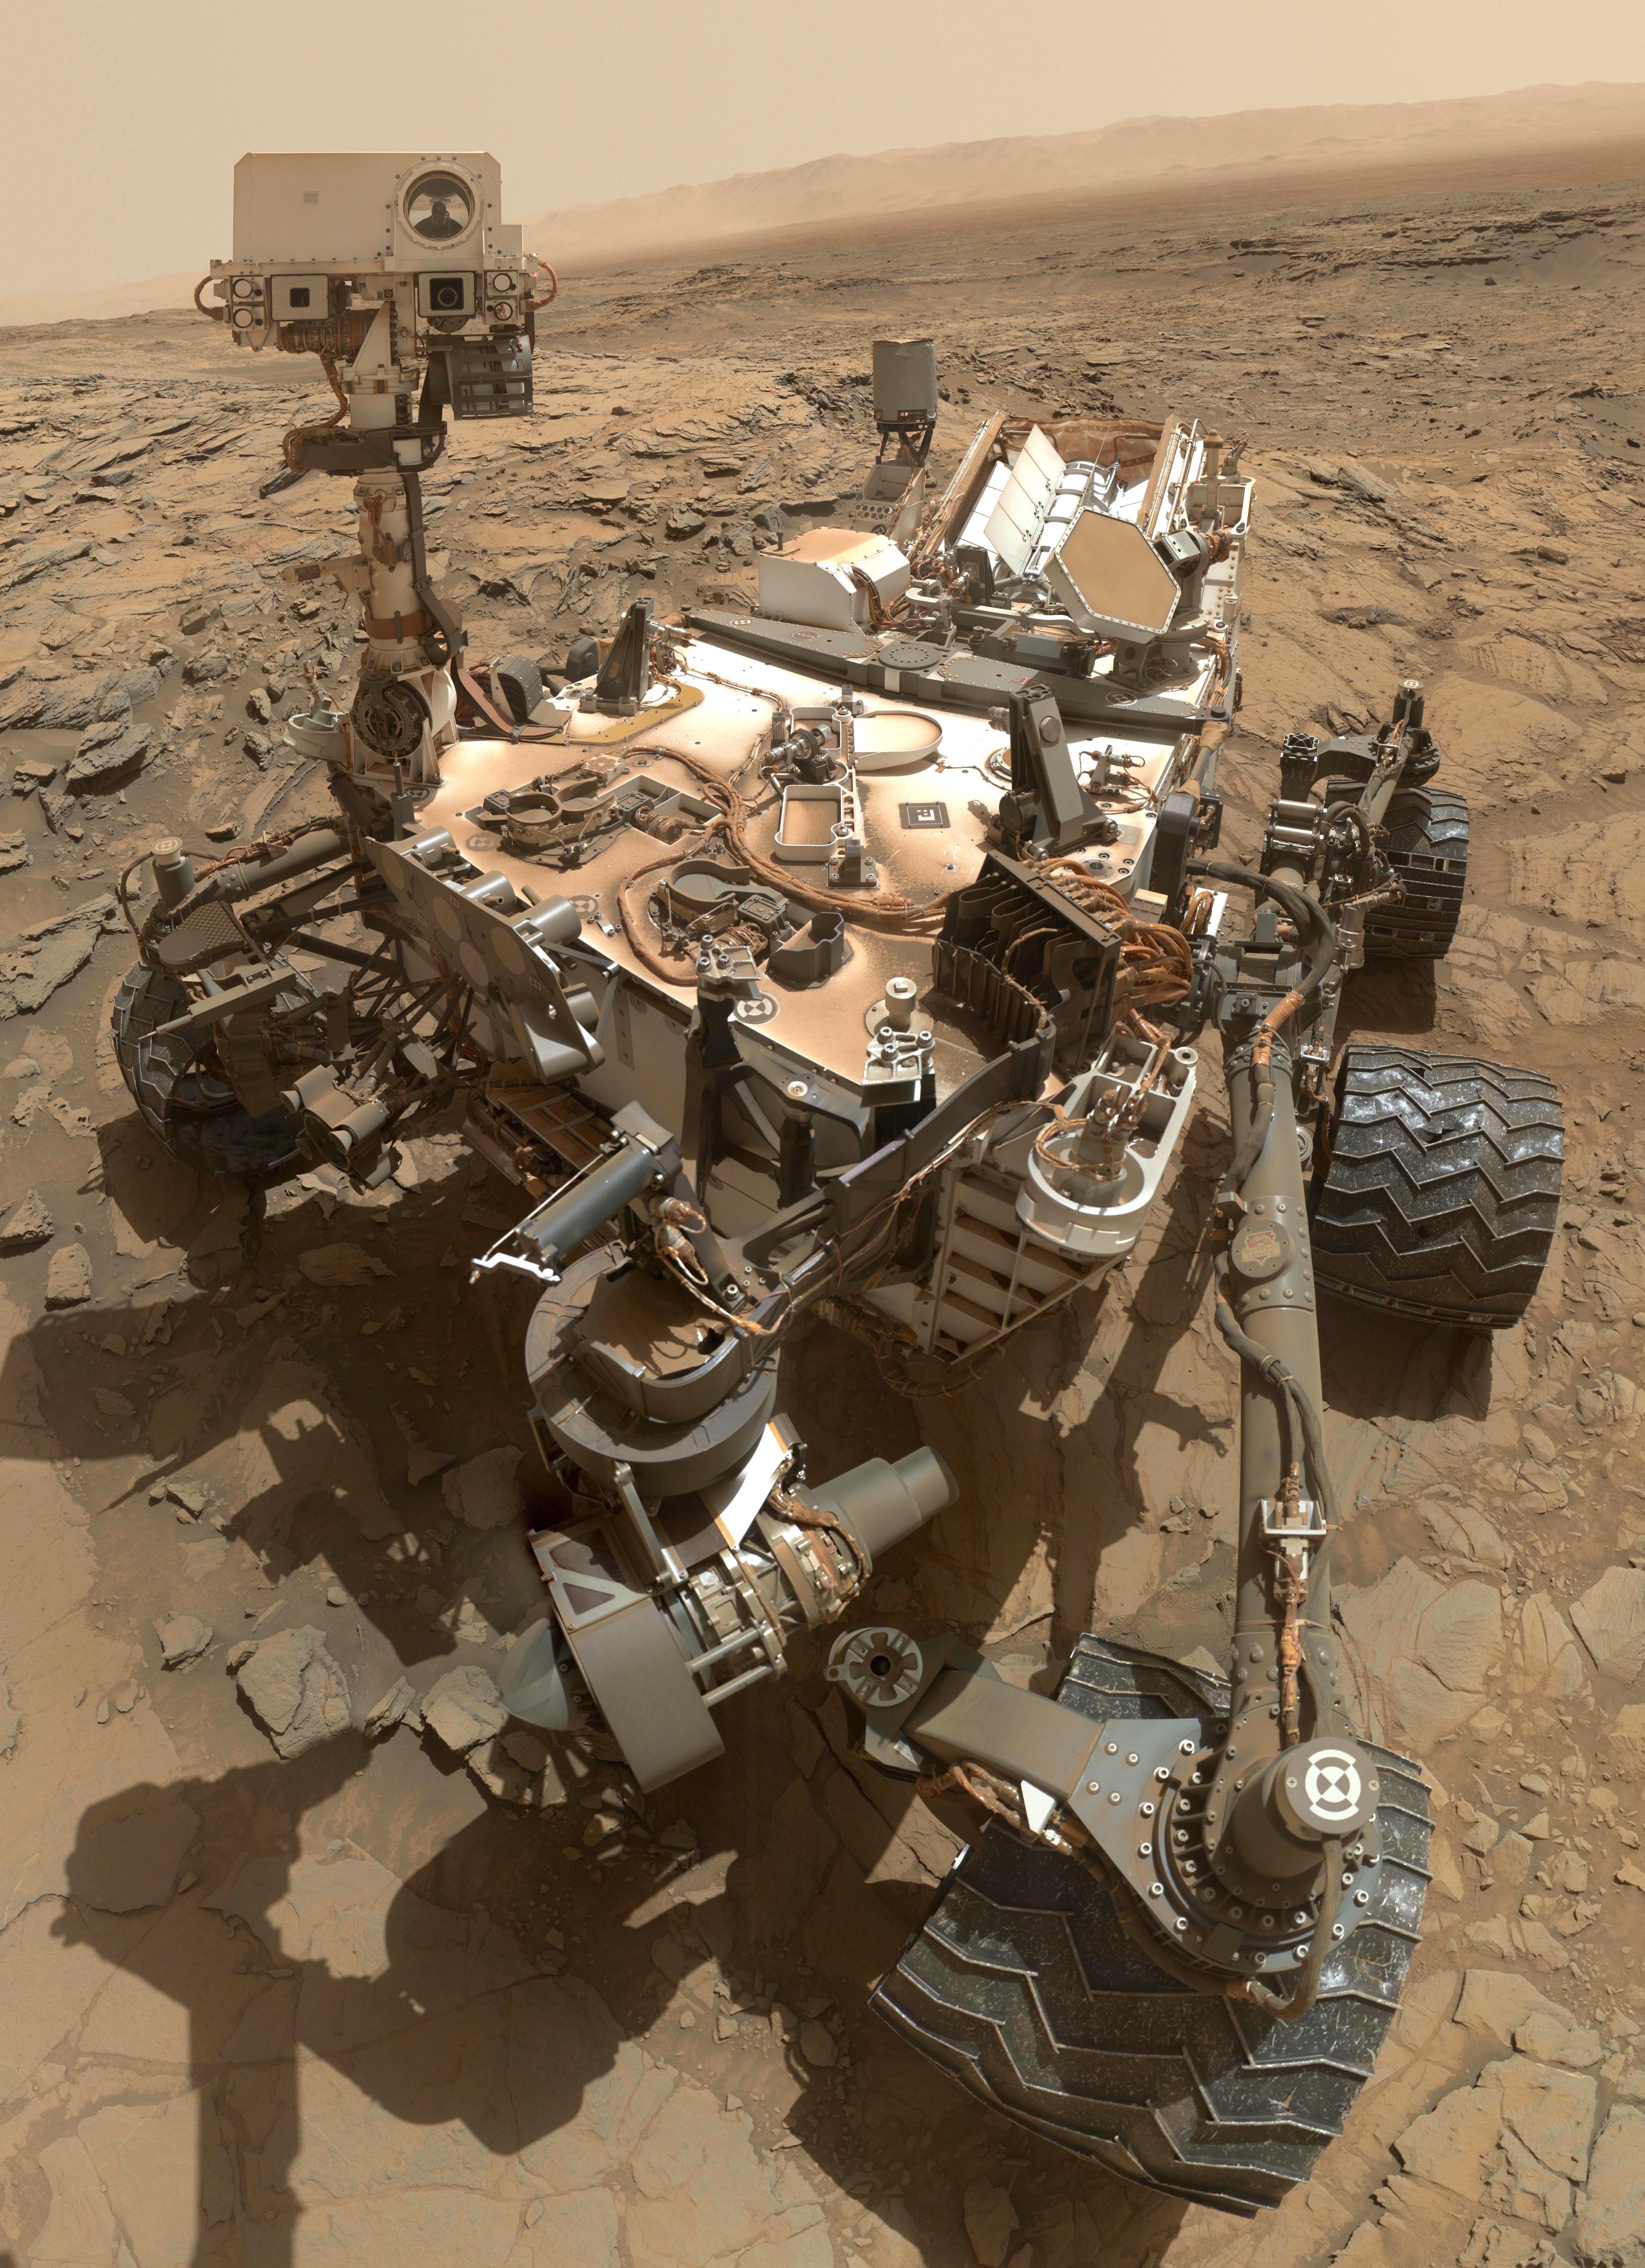

# Import box

In [1]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import pandas as pd
import numpy as np
from ipynb.fs.full.Data_cleaning import call_Curiosity, get_pictures_Curiosity

# CSV call

In [37]:
mars = pd.read_csv("../data/mars-weather-cleaned.csv")

In [40]:
earth = pd.read_csv("../data/papua-weather-cleaned.csv")

## Data description

In [3]:
mars.describe()

Sol        Month     Min_temp     Max_temp     Pressure  \
count  1894.000000  1894.000000  1867.000000  1867.000000  1867.000000   
mean   1007.930306     3.872228   -76.121050   -12.510445   841.066417   
std     567.879561     2.720768     5.504098    10.699454    54.253226   
min       1.000000     1.000000   -90.000000   -35.000000   727.000000   
25%     532.250000     1.000000   -80.000000   -23.000000   800.000000   
50%    1016.500000     3.000000   -76.000000   -11.000000   853.000000   
75%    1501.750000     6.000000   -72.000000    -3.000000   883.000000   
max    1977.000000     9.000000   -62.000000    11.000000   925.000000   

       Atmo_opacity    Mean_temp  
count   1894.000000  1867.000000  
mean       0.998416   -44.315747  
std        0.039778     7.773096  
min        0.000000   -60.500000  
25%        1.000000   -51.500000  
50%        1.000000   -43.500000  
75%        1.000000   -37.500000  
max        1.000000   -28.500000

The import variables are temperature, pressure and opacity. The maximum temperature recorded is 11 ºC, the minimum temperature is -90 ºC and the mean value is -76 ºC.
The maximum pressure recorded is 925 Pa, the minimum is 727 Pa and the average is 841 Pa.
99.8% of the days were sunny.

In [41]:
earth.describe()

Max_temp     Min_temp       Pressure    Mean_temp
count  1755.000000  1755.000000    1755.000000  1755.000000
mean     30.881197    24.168471  100876.706553    27.162621
std       1.562836     1.296352     206.931433     1.239291
min      24.000000    15.000000  100290.000000    22.800000
25%      30.000000    23.722222  100730.000000    26.400000
50%      31.000000    24.000000  100880.000000    27.200000
75%      32.000000    25.000000  101010.000000    28.000000
max      35.111111    27.500000  101520.000000    31.300000

By plotting the temperatures we could obtain the temperature profile on Mars.

# Comparative plots

In [36]:
# Prepare subplots grid
fig = make_subplots(rows=3, cols=2, 
                    subplot_titles=("Temperature cycle of Mars", "Temperature cycle of Papua New Guinea",
                                    "Pressure cycle of Mars", "Pressure cycle of Papua New Guinea",
                                   "Pressure vs Temperature on Mars",
                                   "Pressure vs Temperature on Papua New Guinea"))

# Add traces
fig.add_trace(
    go.Line(x=mars["Earth Date"], y=mars["Mean_temp"], name="Temp Mars"),
    row=1, col=1)
fig.add_trace(
    go.Line(x=earth["Earth Date"], y=earth["Mean_temp"], name="Temp Earth"),
    row=1, col=2)
fig.add_trace(
    go.Line(x=mars["Earth Date"], y=mars["Pressure"], name="Pressure Mars"),
    row=2, col=1)
fig.add_trace(
    go.Line(x=earth["Earth Date"], y=earth["Pressure"], name="Pressure Earth"),
    row=2, col=2)
fig.add_trace(
    go.Scatter(x=mars["Mean_temp"], y=mars["Pressure"], mode="markers", name="Temp vs Pres Mars"),
    row=3, col=1)
fig.add_trace(
    go.Scatter(x=earth["Mean_temp"], y=earth["Pressure"], mode="markers", name="Temp vs Pres Earth"),
    row=3, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Years", row=1, col=1)
fig.update_xaxes(title_text="Years", row=1, col=2)
fig.update_xaxes(title_text="Years", row=2, col=1)
fig.update_xaxes(title_text="Years", row=2, col=2)
fig.update_xaxes(title_text="Temperature (°C)", row=3, col=1)
fig.update_xaxes(title_text="Temperature (°C)", row=3, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Temperature (°C)", row=1, col=1)
fig.update_yaxes(title_text="Temperature (°C)", row=1, col=2)
fig.update_yaxes(title_text="Pressure (Pa)", row=2, col=1)
fig.update_yaxes(title_text="Pressure (Pa)", row=2, col=2)
fig.update_yaxes(title_text="Pressure (Pa)", row=3, col=1)
fig.update_yaxes(title_text="Pressure (Pa)", row=3, col=2)

# Update title and height
fig.update_layout(height=1100, width=1000, title_text="Summary of surface conditions on Mars and Papua New Guinea")
fig.show()

# Correlations

## Correlation Temperature vs Pressure on Mars

In [5]:
temppresmars = mars[["Mean_temp", "Pressure"]]
temppresmars.set_index("Mean_temp", inplace=True)

<AxesSubplot:ylabel='Mean_temp'>

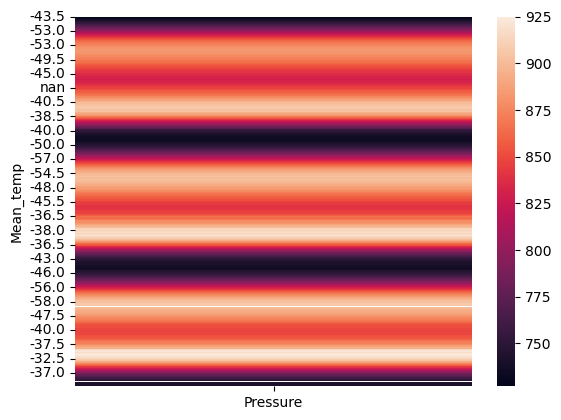

In [6]:
sns.heatmap(temppresmars)

## Correlation Temperature vs Pressure on Papua New Guinea

In [15]:
temppresearth = earth[["Mean_temp", "Pressure"]]
temppresearth.set_index("Mean_temp", inplace=True)

<AxesSubplot:ylabel='Mean_temp'>

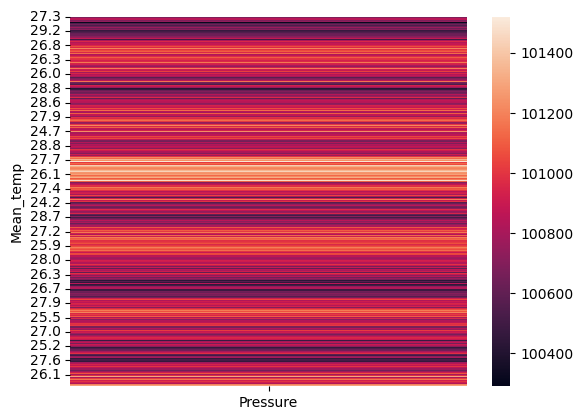

In [16]:
sns.heatmap(temppresearth)